In [ ]:
import HMC5883L_Library as hmc
%matplotlib inline

Iteration #2
--------------------------------------------------
Enter desired data points: 
160
--------------------------------------------------
Time remaining: 2seconds
--------------------------------------------------
          X      Y      Z
159   40.16   6.71 -25.33
158  -52.84 -11.29  31.67
157  -30.84 -12.29  23.67
156   20.16  10.71 -17.33
155  -10.84  -7.29  11.67
154    2.16  -1.29  -4.33
153   12.16  -0.29  -1.33
152  -26.84  -6.29   8.67
151   35.16   1.71 -16.33
150  -50.84  -7.29  24.67
149   60.16  12.71 -30.33
148  -71.84 -17.29  35.67
147   83.16  19.71 -42.33
146  -89.84 -26.29  48.67
145   95.16  16.71 -54.33
144  -96.84 -18.29  56.67
143  101.16  23.71 -61.33
142 -100.84 -17.29  58.67
141   97.16  23.71 -61.33
140  -94.84 -27.29  61.67
139   88.16  18.71 -57.33
138  -81.84 -21.29  53.67
137   76.16  21.71 -49.33
136  -69.84 -14.29  42.67
135   55.16  18.71 -37.33
134  -49.84 -27.29  34.67
133   39.16  14.71 -28.33
132  -30.84  -4.29  22.67
131   23.16   7.71 -11.

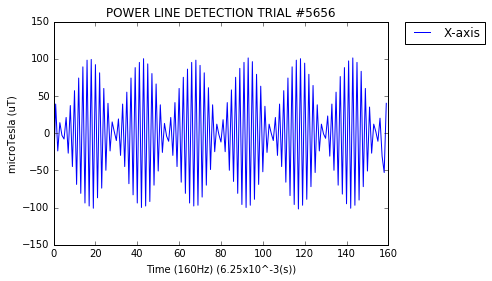

--------------------------------------------------
Saved #5656 in: /home/jared/Desktop/mfvd/Saves


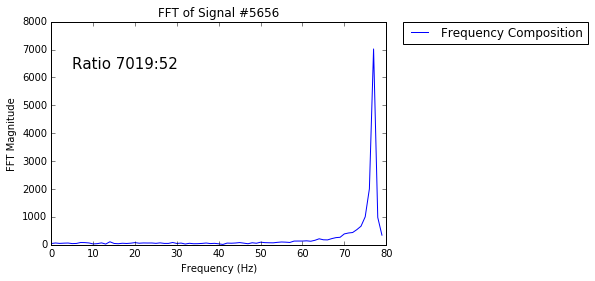

--------------------------------------------------
Do you want to Quit? [Y / n]


In [ ]:
###  MAIN PROGRAM   ###

# Prompts user to configure settings/options associated with the HMC5883L.
hmc.Settings_Config()

i = 0

# Entire program runs on a loop until explicitly exited.
while(1):
    
    # Clears output terminal.
    hmc.clear_output()
    
    # Responisble for prompting user and recording the input.
    hmc.Prompt_Iteration_Amount(i)
    
    # Prepares the ESP32 for data transmission.
    hmc.Begin_Signal()

    hmc.Set_Average()
    
    # Constantly reads in 1 seconds worth of data (160 data points). Prints out
    #   strength of signal based on min and max of the FFT's frequency ratio.
    if(hmc.Operation_Mode == "CONTINUOUS_MODE"):
        while(1):
            
            # Collects incoming data from the ESP32/HMC5883L.
            df = hmc.Collect_Data()
            
            # Clears output terminal.
            hmc.clear_output()

            # Displays signal strength to screen.
            hmc.Display_Signal_Strength(df,i)
    
    # Reads in a user set amount of data. Proceeds to save/print out results in table/graph form.
    elif(hmc.Operation_Mode == "STATIONARY_MODE"):
        
        # Estimates time until completion of data collection and plotting.
        hmc.Time_Until_Done()
        
        # Collects incoming data from the ESP32/HMC5883L.
        df = hmc.Collect_Data()
        
        # Displays the data collected from the magnetometer.
        hmc.Display_Table(df) #DataFrame Table
        hmc.Display_DF(df,i)  #DataFrame Graph
        hmc.Display_FFT(df)   #DataFrame FFT

        # Prompts user to decide if they wish to continue or quit.
        print("Do you want to Quit? [Y / n]")
        quit = input()
        if(quit == 'Y'):
            # Closes serial port.
            hmc.Serial_Close()
            break
        else:
            i = i + 1